In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_dir = r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\augmented_images\wave\training'
test_dir = r'C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\wave\testing'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Rescale pixel values
    validation_split=0.2,  
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',  
    subset='training',
    shuffle=True  
)

Found 288 images belonging to 2 classes.


In [5]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation',
)

Found 71 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  
    batch_size=8,
    class_mode='binary',  
    shuffle=False
)

Found 30 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import GlobalAveragePooling2D,Resizing
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [ ]:
model1 = Sequential([
    Resizing(224, 224),
    base_model,  
    GlobalAveragePooling2D(),  
    Dense(64, activation='relu'),  
    Dropout(0.5),  
    Dense(1, activation='sigmoid')  
])

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [9]:
history1 = model1.fit(
    train_generator,
    epochs=30,  
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30


c:\Users\HP-NBT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 112s 12s/step - accuracy: 0.4675 - loss: 0.7721 - val_accuracy: 0.5211 - val_loss: 0.6972
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 107s 12s/step - accuracy: 0.5133 - loss: 0.7206 - val_accuracy: 0.5634 - val_loss: 0.6784
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 108s 12s/step - accuracy: 0.4830 - loss: 0.7241 - val_accuracy: 0.5915 - val_loss: 0.6684
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 107s 12s/step - accuracy: 0.5674 - loss: 0.6767 - val_accuracy: 0.6620 - val_loss: 0.6569
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 107s 12s/step - accuracy: 0.5995 - loss: 0.6606 - val_accuracy: 0.7324 - val_loss: 0.6482
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 106s 12s/step - accuracy: 0.6238 - loss: 0.6619 - val_accuracy: 0.7324 - val_loss: 0.6437
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 104s 12s/step - accuracy: 0.6993 - loss: 0.6309 - val_accuracy: 0.6901 - val_loss: 0.6310
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 105s 12s/step - accuracy: 0.6438 - loss: 0.6437 - val_accuracy: 0.7183 - val_loss: 0.6190
Epo

In [11]:
test_loss, test_acc = model1.evaluate(test_generator) 

4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8458 - loss: 0.4836


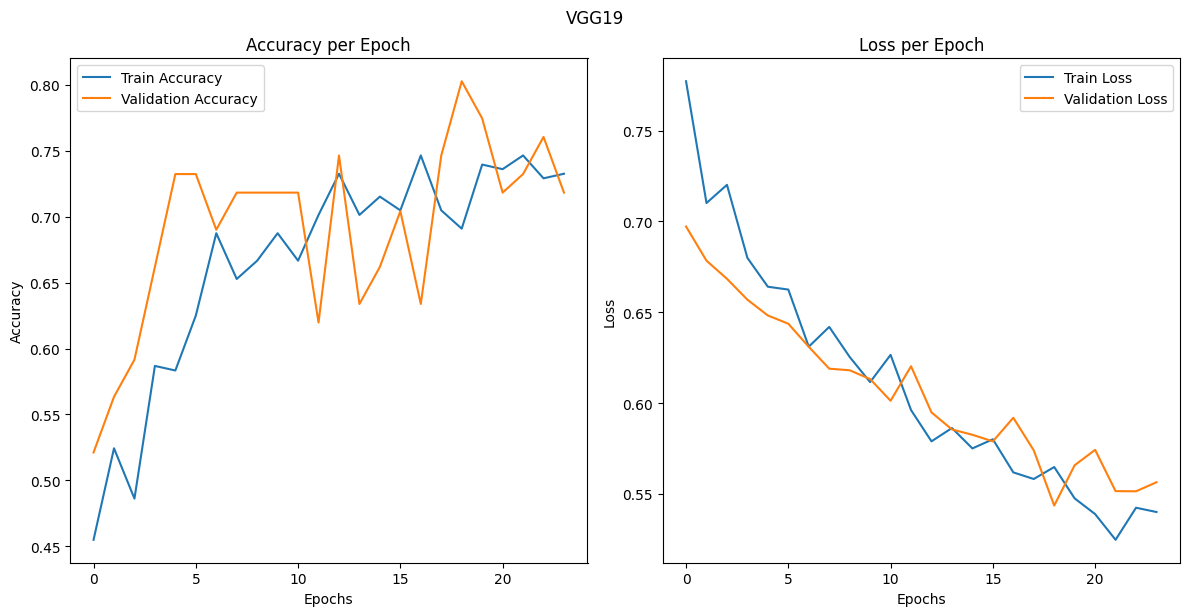

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history1.history['accuracy'], label='Train Accuracy')
axs[0].plot(history1.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history1.history['loss'], label='Train Loss')
axs[1].plot(history1.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("VGG19", y=1.02, fontsize=12)
plt.show()

In [ ]:
# model2.save('vgg19_wave_(1).keras') 
# print("VGG19 model saved as vgg19_wave_(1).keras")

VGG19 model saved as vgg19_wave_(1).keras


In [15]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

base_model_inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model_inception.trainable = False

In [ ]:
model2 = Sequential([
    base_model_inception,  
    GlobalAveragePooling2D(),  
    Dense(128, activation='relu'),  
    Dropout(0.5),  
    Dense(1, activation='sigmoid') 
])

In [17]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [18]:
history4 = model2.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4888 - loss: 0.9644 - val_accuracy: 0.6479 - val_loss: 0.6184
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 999ms/step - accuracy: 0.6573 - loss: 0.7242 - val_accuracy: 0.6197 - val_loss: 0.6036
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6608 - loss: 0.6203 - val_accuracy: 0.7465 - val_loss: 0.5628
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 960ms/step - accuracy: 0.6957 - loss: 0.5787 - val_accuracy: 0.7183 - val_loss: 0.5806
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.7240 - loss: 0.5507 - val_accuracy: 0.7887 - val_loss: 0.5378
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 984ms/step - accuracy: 0.7305 - loss: 0.5007 - val_accuracy: 0.7324 - val_loss: 0.5185
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 950ms/step - accuracy: 0.7121 - loss: 0.5525 - val_accuracy: 0.7042 - val_loss: 0.5432
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 978ms/step - accuracy: 0.7212 - loss: 0.5479 - val_accuracy: 0.7887 - val_loss: 

In [ ]:
test_loss, test_acc = model2.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - accuracy: 0.9258 - loss: 0.3603
Test Accuracy: 0.87


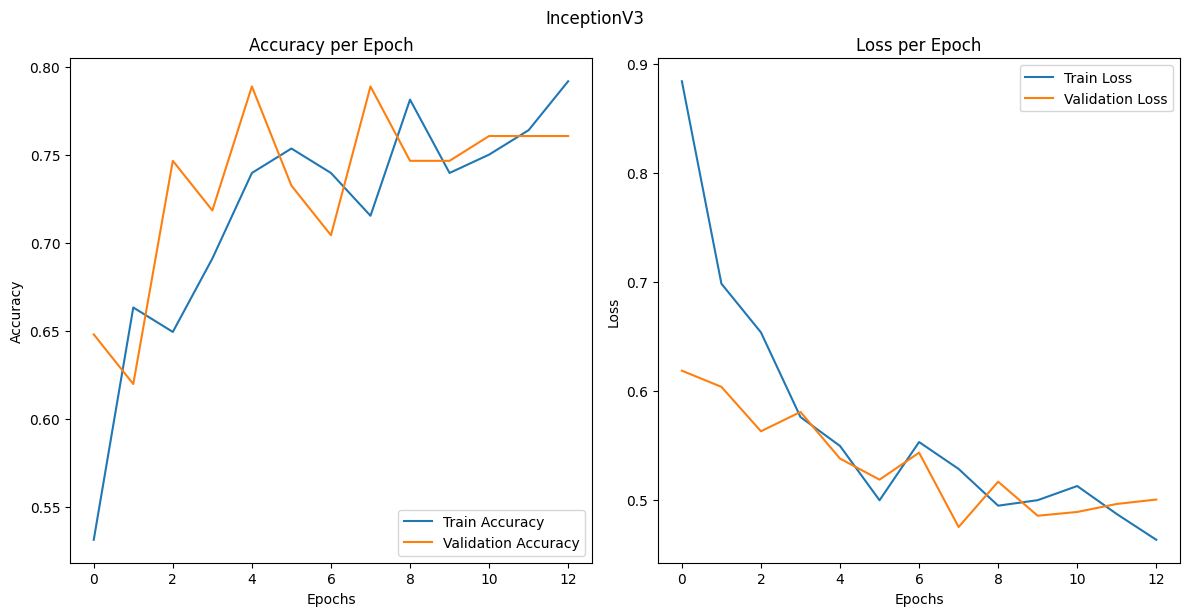

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history4.history['accuracy'], label='Train Accuracy')
axs[0].plot(history4.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss
axs[1].plot(history4.history['loss'], label='Train Loss')
axs[1].plot(history4.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("InceptionV3", y=1.02, fontsize=12)
plt.show()

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model_densenet.trainable = False

model3 = Sequential([
    base_model_densenet,
    GlobalAveragePooling2D(),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [22]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history3 = model3.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4911 - loss: 0.8755 - val_accuracy: 0.6620 - val_loss: 0.6134
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6051 - loss: 0.6905 - val_accuracy: 0.7324 - val_loss: 0.5831
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7264 - loss: 0.5734 - val_accuracy: 0.8028 - val_loss: 0.4957
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7195 - loss: 0.5458 - val_accuracy: 0.8028 - val_loss: 0.4904
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7228 - loss: 0.5496 - val_accuracy: 0.7465 - val_loss: 0.4973
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.7171 - loss: 0.5660 - val_accuracy: 0.7324 - val_loss: 0.5053
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7159 - loss: 0.5598 - val_accuracy: 0.7606 - val_loss: 0.4887
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.7476 - loss: 0.5065 - val_accuracy: 0.7887 - val_loss: 0.5062
Epoch 9/

In [24]:
test_loss, test_acc = model3.evaluate(test_generator)
print(f"Test Accuracy: {test_acc}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 286ms/step - accuracy: 0.8800 - loss: 0.3253
Test Accuracy: 0.8666666746139526


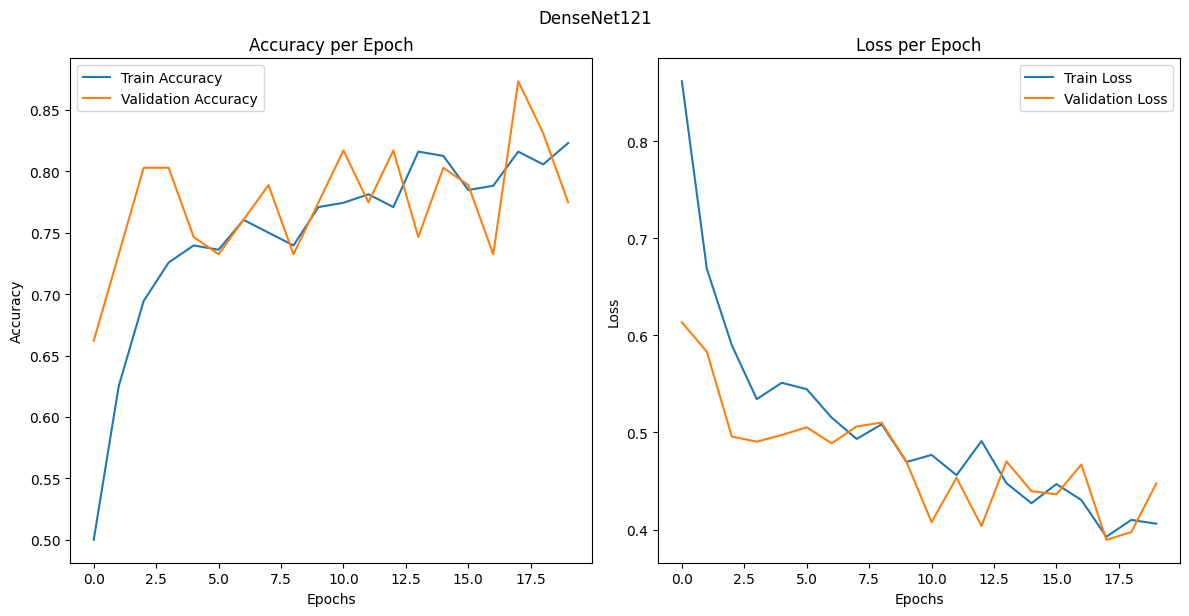

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history3.history['accuracy'], label='Train Accuracy')
axs[0].plot(history3.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

# Plot loss
axs[1].plot(history3.history['loss'], label='Train Loss')
axs[1].plot(history3.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("DenseNet121", y=1.02, fontsize=12)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input, Concatenate, Lambda
from tensorflow.keras.models import Model

input_shape = (150, 150, 3)
input_layer = Input(shape=input_shape)
resize_layer = Lambda(lambda image: tf.image.resize(image, (224, 224)))(input_layer)

vgg_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg_base.trainable = False  
vgg_output = vgg_base(resize_layer)  # Pass resized input through VGG19
vgg_features = GlobalAveragePooling2D()(vgg_output)  

inc_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inc_base.trainable = False  
inc_output = inc_base(resize_layer)  
inc_features = GlobalAveragePooling2D()(inc_output)  

merged = Concatenate()([vgg_features, inc_features])

x = Dense(256, activation='relu')(merged)
x = Dropout(0.5)(x)
output_layer = Dense(1, activation='sigmoid')(x) 

model9 = Model(inputs=input_layer, outputs=output_layer)

model9.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history9 = model9.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30
)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 149s 15s/step - accuracy: 0.5313 - loss: 1.2700 - val_accuracy: 0.6479 - val_loss: 0.6242
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 123s 14s/step - accuracy: 0.5902 - loss: 0.7958 - val_accuracy: 0.7042 - val_loss: 0.5787
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 14s/step - accuracy: 0.6166 - loss: 0.7242 - val_accuracy: 0.5775 - val_loss: 0.6894
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 14s/step - accuracy: 0.7436 - loss: 0.5390 - val_accuracy: 0.7746 - val_loss: 0.5295
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 14s/step - accuracy: 0.7059 - loss: 0.5616 - val_accuracy: 0.8169 - val_loss: 0.5281
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 122s 14s/step - accuracy: 0.7768 - loss: 0.4577 - val_accuracy: 0.7606 - val_loss: 0.5122
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 132s 15s/step - accuracy: 0.7418 - loss: 0.5243 - val_accuracy: 0.6620 - val_loss: 0.6040
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 119s 13s/step - accuracy: 0.7433 - loss: 0.5238 - val_accuracy: 0.7465 - val_loss:

In [30]:
# Evaluate the model on the test set
test_loss, test_acc = model9.evaluate(test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.9258 - loss: 0.2703


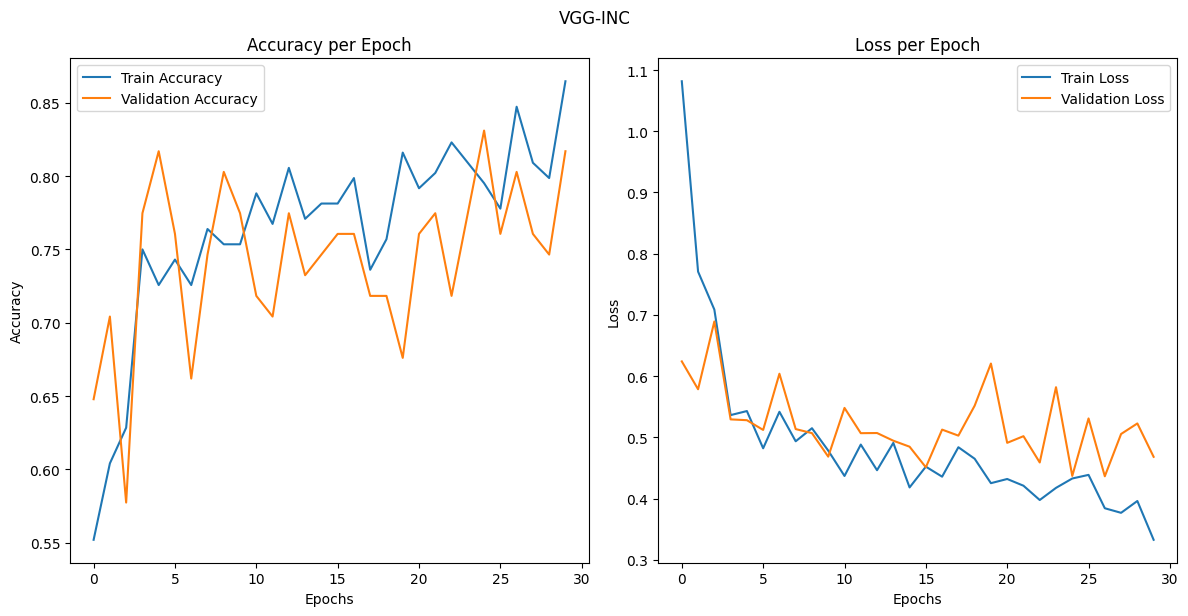

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(history9.history['accuracy'], label='Train Accuracy')
axs[0].plot(history9.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Accuracy per Epoch')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(history9.history['loss'], label='Train Loss')
axs[1].plot(history9.history['val_loss'], label='Validation Loss')
axs[1].set_title('Loss per Epoch')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()

plt.tight_layout()
fig.suptitle("VGG-INC", y=1.02, fontsize=12)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step 
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000016032195D00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 4s/step


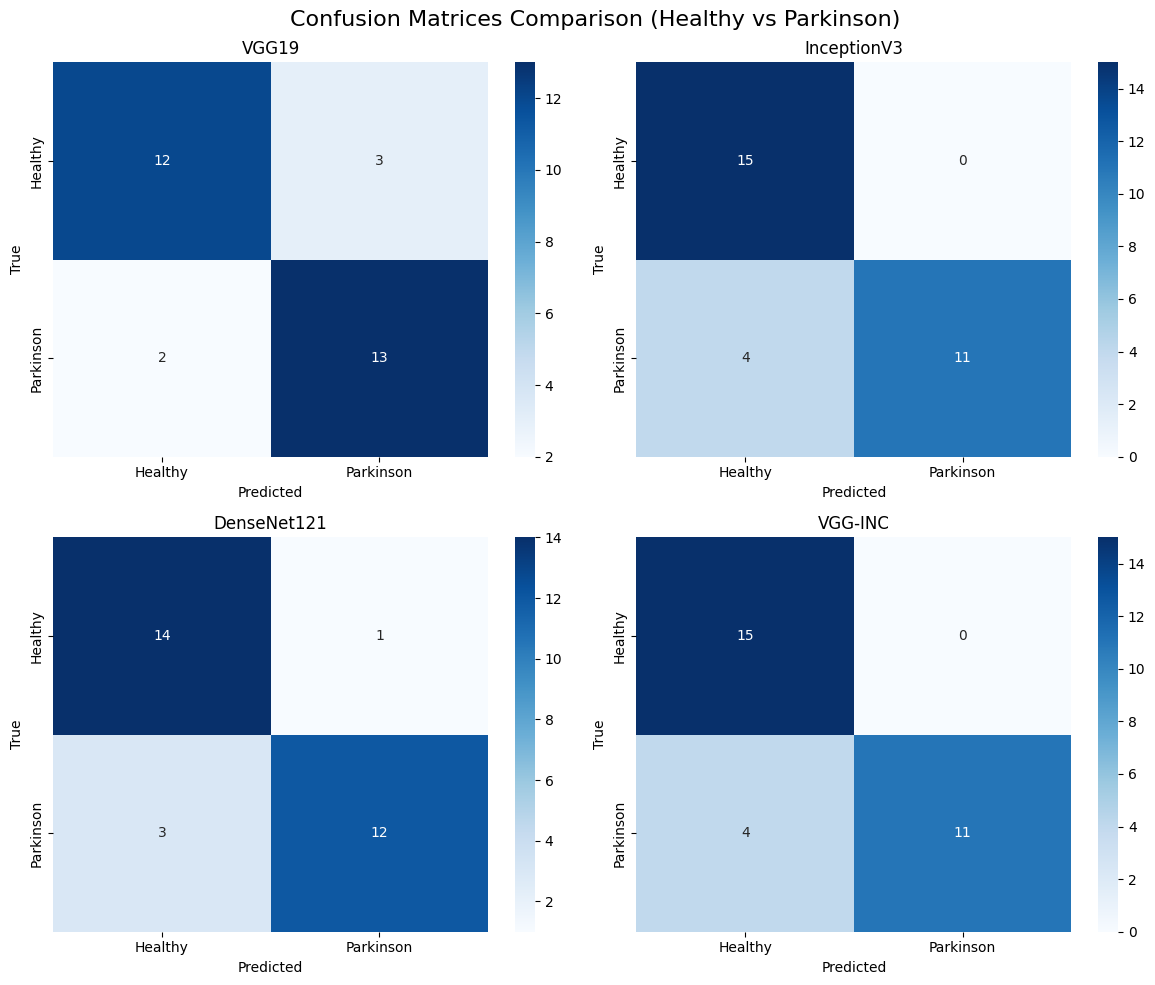

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = test_generator.classes

def get_predictions(model, generator):
    y_pred = model.predict(generator)
    return (y_pred > 0.5).astype(int) 

y_pred1 = get_predictions(model1, test_generator).flatten()
y_pred3 = get_predictions(model2, test_generator).flatten()
y_pred4 = get_predictions(model3, test_generator).flatten()
y_pred5 = get_predictions(model9, test_generator).flatten()

cm1 = confusion_matrix(y_true, y_pred1)
cm3 = confusion_matrix(y_true, y_pred3)
cm4 = confusion_matrix(y_true, y_pred4)
cm5 = confusion_matrix(y_true, y_pred5)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices Comparison (Healthy vs Parkinson)', fontsize=16)

def plot_cm(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Healthy', 'Parkinson'], 
                yticklabels=['Healthy', 'Parkinson'],
                ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

plot_cm(cm1, axes[0, 0], 'VGG19')
plot_cm(cm3, axes[0, 1], 'InceptionV3')
plot_cm(cm4, axes[1, 0], 'DenseNet121')
plot_cm(cm5, axes[1, 1], 'VGG-INC')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

def predict_image(model, img_path):
    target_size = model.input_shape[1:3]
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array_exp)

    result = "Parkinson" if prediction >= 0.5 else "Healthy"
    confidence = prediction[0][0] if prediction >= 0.5 else 1 - prediction[0][0]

    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"{result} (Confidence: {confidence:.2f})", fontsize=14)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step


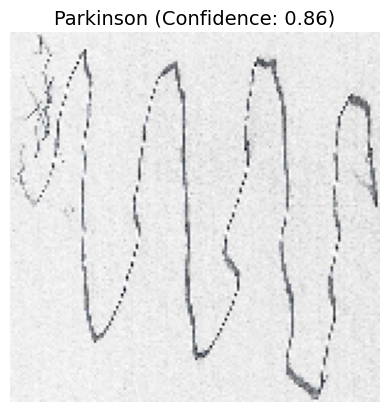

In [ ]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\wave\testing\parkinson\V04PO01.png"  
predict_image(model3, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


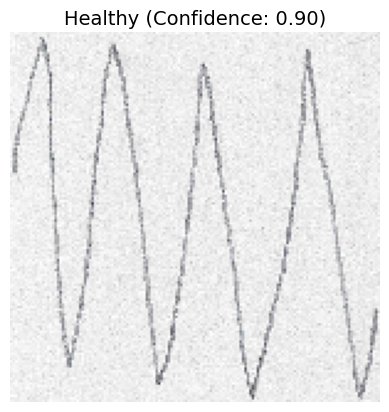

In [ ]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\wave\testing\healthy\V11HO01.png"  
predict_image(model3, img_path)

In [ ]:
import numpy as np
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
from tensorflow.keras.preprocessing import image


c:\Users\HP-NBT\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
def predict_fn(imgs):
    imgs = np.array(imgs)
    preds = model3.predict(imgs)  
    return preds

In [ ]:
img_path = r"C:\Users\HP-NBT\Desktop\project\Dissertation\dataset\wave\testing\healthy\V11HO01.png"  
img = image.load_img(img_path, target_size=(299, 299))  
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) 

In [ ]:
# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    img_array[0].astype('double'),  
    predict_fn,
    top_labels=2,  
    hide_color=0,
    num_samples=1000  
)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step


  1%|          | 10/1000 [00:16<26:42,  1.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 28/1000 [00:18<07:43,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  3%|▎         | 33/1000 [00:20<07:06,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▍         | 49/1000 [00:22<03:46,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  5%|▌         | 54/1000 [00:24<04:35,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  6%|▌         | 60/1000 [00:26<04:42,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 77/1000 [00:28<02:51,  5.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


  8%|▊         | 81/1000 [00:30<03:40,  4.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 10%|▉         | 96/1000 [00:31<02:30,  6.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 106/1000 [00:34<02:28,  6.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 11%|█         | 110/1000 [00:35<03:21,  4.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 129/1000 [00:37<01:55,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 13%|█▎        | 133/1000 [00:39<02:47,  5.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 15%|█▍        | 149/1000 [00:41<01:53,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 15%|█▌        | 153/1000 [00:43<02:58,  4.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 16%|█▌        | 160/1000 [00:45<03:11,  4.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 177/1000 [00:47<02:25,  5.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 18%|█▊        | 185/1000 [00:50<02:39,  5.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 20%|█▉        | 198/1000 [00:52<02:11,  6.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██        | 209/1000 [00:54<02:09,  6.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 21%|██▏       | 213/1000 [00:56<03:06,  4.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 23%|██▎       | 226/1000 [00:58<02:20,  5.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 238/1000 [01:00<01:58,  6.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 24%|██▍       | 242/1000 [01:02<02:46,  4.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 258/1000 [01:04<01:50,  6.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 26%|██▌       | 262/1000 [01:06<02:35,  4.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 27%|██▋       | 270/1000 [01:07<02:28,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 289/1000 [01:09<01:34,  7.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 29%|██▉       | 293/1000 [01:11<02:11,  5.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 31%|███       | 308/1000 [01:13<01:33,  7.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 31%|███       | 312/1000 [01:14<02:11,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 32%|███▏      | 320/1000 [01:16<02:12,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 33%|███▎      | 330/1000 [01:18<02:01,  5.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 35%|███▍      | 347/1000 [01:19<01:27,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▌      | 359/1000 [01:21<01:22,  7.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 36%|███▋      | 364/1000 [01:23<01:52,  5.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 377/1000 [01:25<01:36,  6.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 38%|███▊      | 381/1000 [01:27<02:13,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|███▉      | 398/1000 [01:29<01:28,  6.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 40%|████      | 402/1000 [01:31<02:02,  4.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 42%|████▏     | 417/1000 [01:32<01:24,  6.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 42%|████▏     | 421/1000 [01:34<01:57,  4.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 43%|████▎     | 430/1000 [01:36<01:51,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▍     | 449/1000 [01:38<01:12,  7.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 45%|████▌     | 453/1000 [01:40<01:41,  5.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 46%|████▌     | 460/1000 [01:41<01:52,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 48%|████▊     | 475/1000 [01:43<01:23,  6.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 489/1000 [01:45<01:11,  7.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 49%|████▉     | 493/1000 [01:47<01:45,  4.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 50%|█████     | 500/1000 [01:49<01:47,  4.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 519/1000 [01:51<01:03,  7.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 52%|█████▏    | 523/1000 [01:52<01:23,  5.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 54%|█████▍    | 539/1000 [01:54<00:59,  7.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 54%|█████▍    | 544/1000 [01:56<01:25,  5.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 55%|█████▌    | 550/1000 [01:58<01:36,  4.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 57%|█████▋    | 568/1000 [01:59<00:58,  7.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 57%|█████▋    | 572/1000 [02:01<01:21,  5.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 58%|█████▊    | 580/1000 [02:03<01:21,  5.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 60%|█████▉    | 596/1000 [02:04<00:58,  6.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████    | 609/1000 [02:06<00:51,  7.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 61%|██████▏   | 614/1000 [02:08<01:11,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 62%|██████▏   | 620/1000 [02:10<01:21,  4.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 638/1000 [02:12<00:48,  7.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 64%|██████▍   | 642/1000 [02:13<01:04,  5.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▌   | 659/1000 [02:15<00:42,  8.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 66%|██████▋   | 663/1000 [02:17<00:59,  5.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 676/1000 [02:18<00:49,  6.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 68%|██████▊   | 680/1000 [02:20<01:08,  4.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 70%|██████▉   | 699/1000 [02:22<00:40,  7.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 70%|███████   | 703/1000 [02:24<00:54,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 71%|███████   | 710/1000 [02:25<00:57,  5.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 72%|███████▏  | 720/1000 [02:27<00:51,  5.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 74%|███████▍  | 739/1000 [02:29<00:32,  7.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 75%|███████▍  | 747/1000 [02:31<00:38,  6.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 76%|███████▌  | 758/1000 [02:33<00:35,  6.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 76%|███████▌  | 762/1000 [02:34<00:48,  4.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 779/1000 [02:36<00:28,  7.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 78%|███████▊  | 784/1000 [02:38<00:37,  5.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 80%|███████▉  | 798/1000 [02:39<00:27,  7.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 80%|████████  | 802/1000 [02:41<00:39,  4.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 819/1000 [02:43<00:24,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 82%|████████▏ | 823/1000 [02:45<00:36,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 83%|████████▎ | 830/1000 [02:47<00:37,  4.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 84%|████████▍ | 840/1000 [02:49<00:32,  4.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▌ | 859/1000 [02:51<00:19,  7.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 86%|████████▋ | 863/1000 [02:52<00:25,  5.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 88%|████████▊ | 879/1000 [02:54<00:15,  7.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 88%|████████▊ | 883/1000 [02:56<00:22,  5.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 89%|████████▉ | 890/1000 [02:58<00:22,  4.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 91%|█████████ | 908/1000 [02:59<00:12,  7.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 92%|█████████▏| 916/1000 [03:01<00:14,  5.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 92%|█████████▏| 920/1000 [03:03<00:17,  4.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 94%|█████████▍| 939/1000 [03:05<00:07,  7.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 94%|█████████▍| 943/1000 [03:07<00:10,  5.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


 95%|█████████▌| 950/1000 [03:08<00:09,  5.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 968/1000 [03:10<00:04,  7.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 97%|█████████▋| 972/1000 [03:12<00:05,  5.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


 98%|█████████▊| 980/1000 [03:14<00:04,  4.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|█████████▉| 998/1000 [03:15<00:00,  7.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


100%|██████████| 1000/1000 [03:17<00:00,  5.07it/s]


In [ ]:
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],  
    positive_only=False,  
    num_features=5,  
    hide_rest=False
)

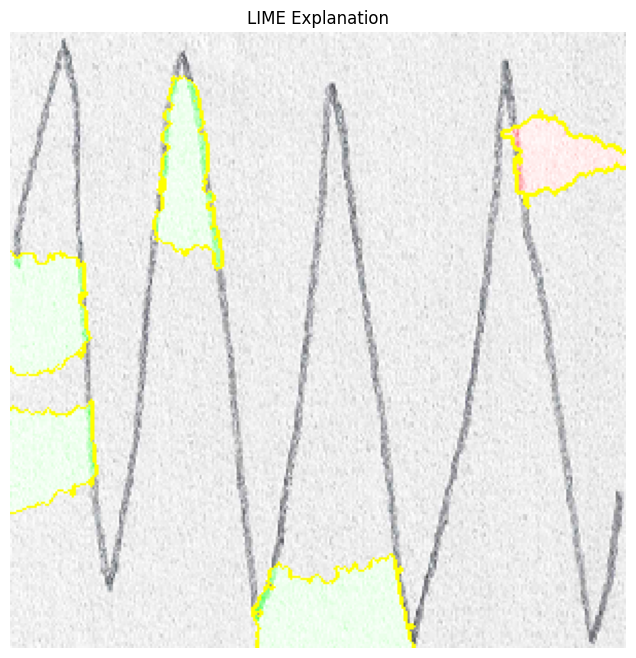

In [ ]:
plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.title("LIME Explanation")
plt.axis("off")
plt.show()